# **Data Visualization Assignment**
---
### **Dataset:** `covid_data.csv`
#### **Objective:**
This assignment focuses on using **Matplotlib** to visualize and analyze COVID-19 data. Through the questions, you'll strengthen your data visualization skills and draw meaningful insights.

#### **Dataset Columns:**
- **Date**: Date of data entry.
- **Country**: Name of the country.
- **Confirmed Cases**: Cumulative confirmed cases till that date.
- **Deaths**: Cumulative deaths till that date.
- **Recoveries**: Cumulative recoveries till that date.

---

### **Assignment Scope:**
1. Understand and clean the dataset.
2. Explore trends in confirmed cases, recoveries, and deaths.
3. Analyze country-wise performance and growth rates.
4. Visualize patterns using Matplotlib.
5. Develop clear and visually appealing plots.

---

#### Import the library and dataset

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("covid_data.csv")
df.head()

,Date,Country,Confirmed Cases,Deaths,Recoveries
0,2024-01-01,USA,100,2,10
1,2024-01-01,India,80,1,5
2,2024-01-01,Brazil,60,3,8
3,2024-01-02,USA,200,5,20
4,2024-01-02,India,150,2,15


Q1. Plot the daily confirmed cases over time for all countries.

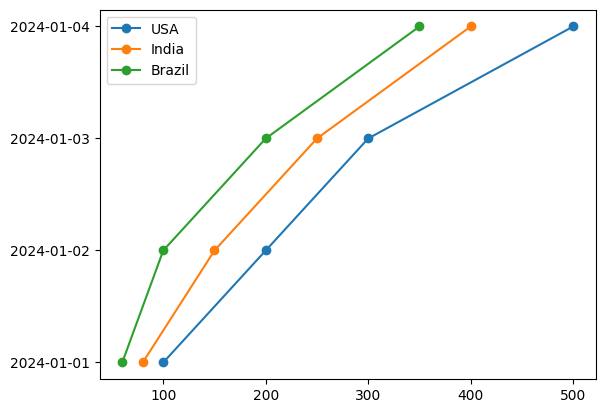

In [158]:
for country in df["Country"].unique():
    #plt.subplot(df.shape[0],1,i)
    plt.plot(df[df["Country"]==country]["Confirmed Cases"],df["Date"].unique(),marker="o")
#plt.xlabel()
#plt.ylabel()
#plt.title()
plt.legend(df["Country"].unique())
plt.show()

Q2. Compare the total deaths across countries using a bar chart

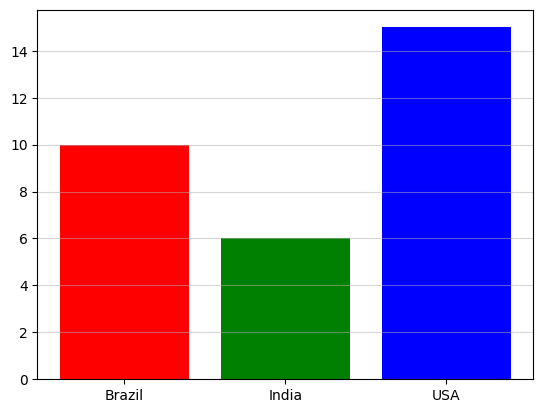

In [159]:
#plt.bar(df["Deaths"],df)
data=df.groupby("Country")["Deaths"].max()
plt.bar(data.index,data.values,color="r g b".split())
plt.grid(axis="y",alpha=0.5)
plt.show()

Q3. Create a pie chart for global proportions of confirmed cases.

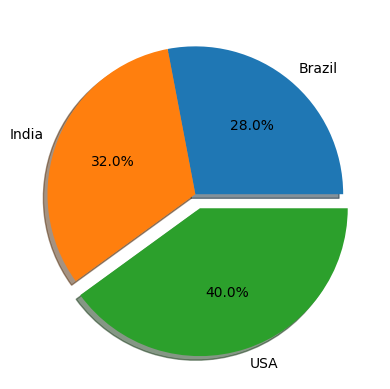

In [160]:
data=df.groupby("Country")["Confirmed Cases"].max()
plt.pie(data.values,labels=data.index,autopct="%.1f%%",explode=(0,0,0.1),shadow=True)
plt.show()

Q4. Show the growth rate of confirmed cases for a specific country.

C:\Users\BJIT\AppData\Local\Temp\ipykernel_8040\2599843866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df["Growth Rate"]=country_df["Confirmed Cases"].pct_change()*100


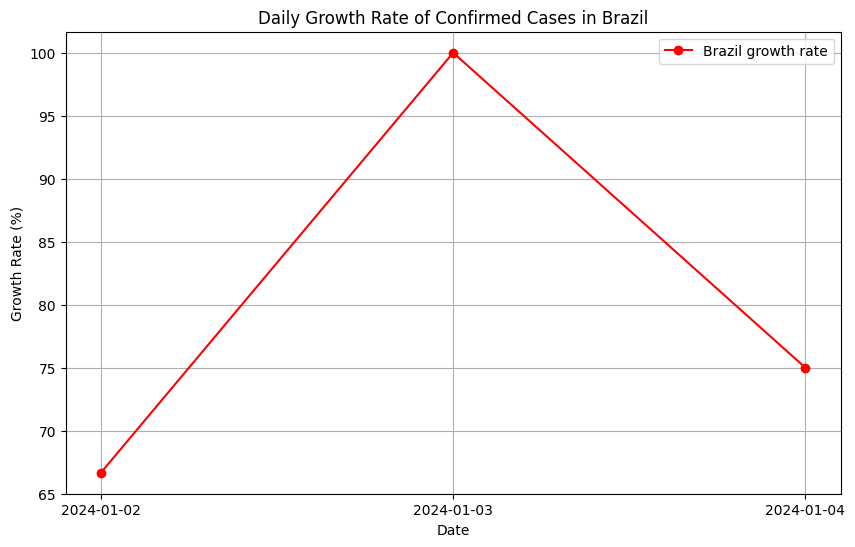

In [161]:
country="Brazil"
country_df=df[df["Country"]==country]
country_df
country_df["Growth Rate"]=country_df["Confirmed Cases"].pct_change()*100
plt.figure(figsize=(10,6))
plt.plot(country_df["Date"],country_df["Growth Rate"],marker="o",color="r",label=f"{country} growth rate")
plt.title(f"Daily Growth Rate of Confirmed Cases in {country}")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.legend()
plt.show()

Q5. Highlight the top 2 countries with the highest cumulative recoveries using a stacked bar chart.

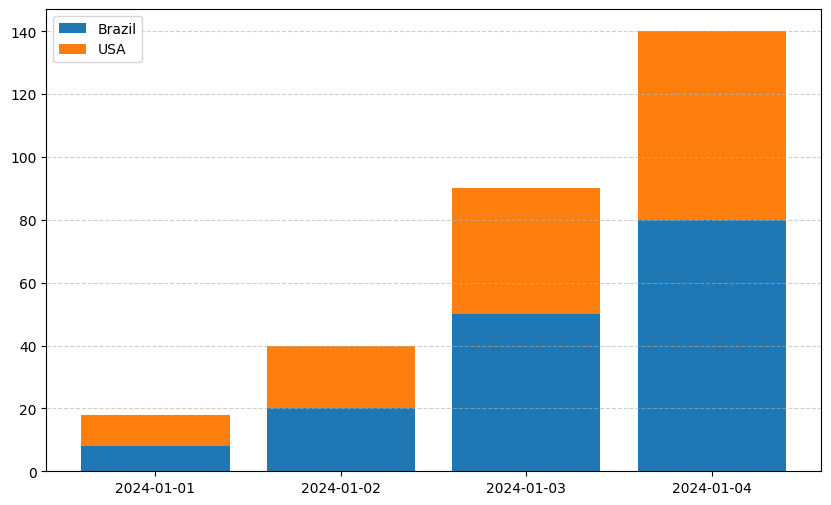

In [162]:
#df = df.sort_values(by='Date')
all_country_latest_reccovery=df.groupby('Country')['Recoveries'].max()
top_two_country_recovery=all_country_latest_reccovery.nlargest(2)
top_two_all_data_by_date=df[df["Country"].isin(top_two_country_recovery.index)]
plt.figure(figsize=(10,6))
data1=df[df["Country"]==top_two_country_recovery.index[0]]
plt.bar(data1["Date"],data1["Recoveries"],label=top_two_country_recovery.index[0])
data2=df[df["Country"]==top_two_country_recovery.index[1]]
plt.bar(data2["Date"],data2["Recoveries"],bottom=data1["Recoveries"],label=top_two_country_recovery.index[1])
plt.grid(axis="y",linestyle="--",alpha=0.6)
plt.legend(top_two_country_recovery.index)
plt.show()

Q6. Plot a heatmap of active cases for each country over time.

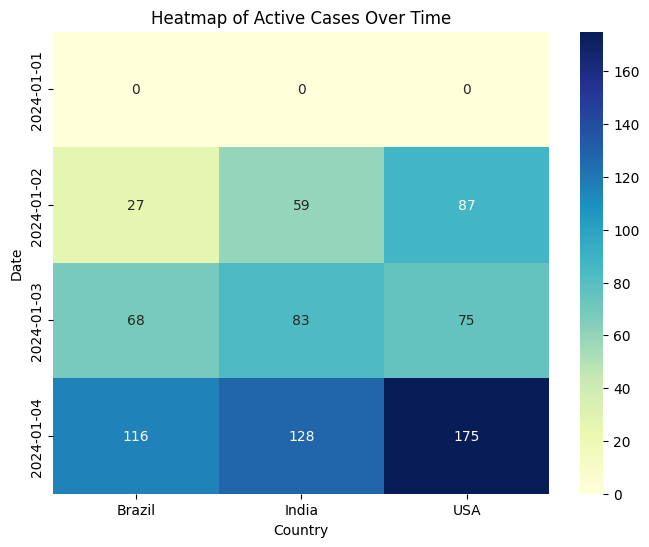

In [169]:
import seaborn as sns
df['Active Cases'] = df['Confirmed Cases'] - (df['Deaths'] + df['Recoveries'])
df['Daily Active Cases'] = df.groupby('Country')['Active Cases'].diff().fillna(0)
active_case_data = df.pivot(index='Date', columns='Country', values='Daily Active Cases')
active_case_data.head()
plt.figure(figsize=(8, 6))
sns.heatmap(active_case_data, annot=True,fmt='.0f',cmap="YlGnBu")
plt.title('Heatmap of Active Cases Over Time')
plt.xlabel('Country')
plt.ylabel('Date')

plt.show()

Q7. Calculate and plot the rolling 3-day average of confirmed cases for each country.

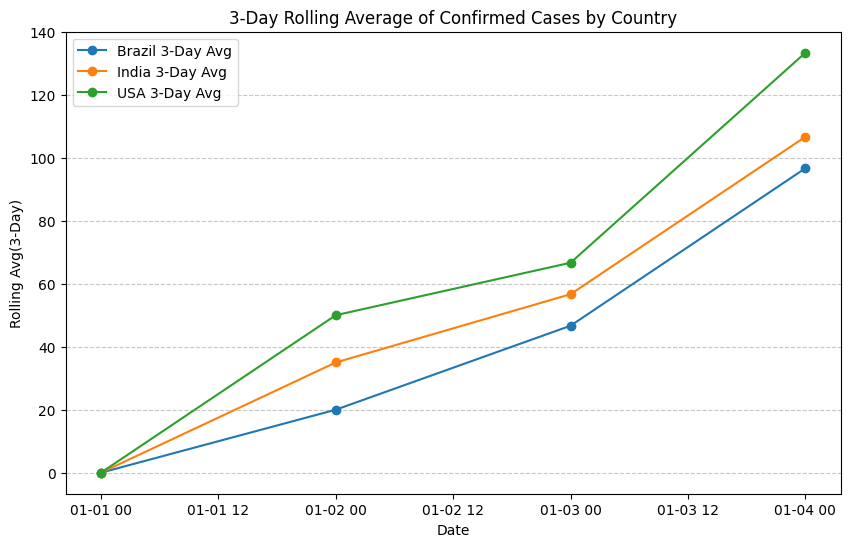

In [170]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Country', 'Date'])
df['Daily Confirmed Cases'] = df.groupby('Country')['Confirmed Cases'].diff().fillna(0)
df["Rolling Average"] =df.groupby("Country")["Daily Confirmed Cases"].rolling(window=3,min_periods=1).mean().reset_index(level=0,drop=True)
plt.figure(figsize=(10, 6))
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Date'],country_data['Rolling Average'],marker='o', label=f"{country} 3-Day Avg")
 
plt.title("3-Day Rolling Average of Confirmed Cases by Country")
plt.xlabel("Date")
plt.ylabel("Rolling Avg(3-Day)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q8. Compare daily new deaths across countries using a line plot.

C:\Users\BJIT\AppData\Local\Temp\ipykernel_8040\1944269596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Daily Deaths'] = country_data['Deaths'].diff().fillna(0)
C:\Users\BJIT\AppData\Local\Temp\ipykernel_8040\1944269596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Daily Deaths'] = country_data['Deaths'].diff().fillna(0)
C:\Users\BJIT\AppData\Local\Temp\ipykernel_8040\1944269596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

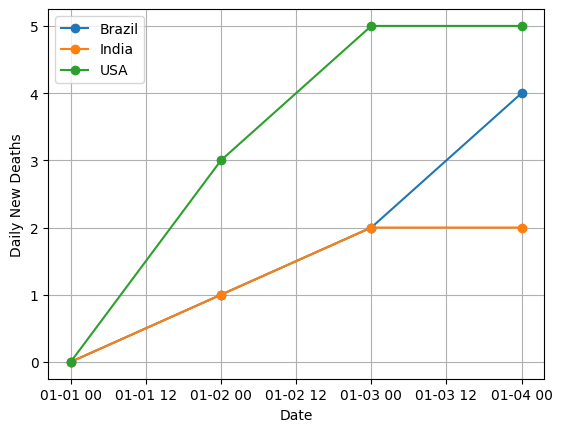

In [173]:
countries = df['Country'].unique()
for country in countries:
    country_data = df[df['Country'] == country]
    country_data['Daily Deaths'] = country_data['Deaths'].diff().fillna(0)
    #print(country_data)
    plt.plot(country_data['Date'], country_data['Daily Deaths'], label=country,marker='o')
plt.xlabel('Date')
plt.ylabel('Daily New Deaths')
plt.grid(True)
plt.legend()
plt.show()

Q9. Show the percentage increase in recoveries for each country over time.

In [10]:
# Code here

Q10. Find and highlight the day with the maximum deaths for each country.

In [11]:
# Code here